<a href="https://colab.research.google.com/github/iamBehzad/Streamlit-ChurnModel-Classification/blob/main/PyCaret_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install pycaret

In [3]:
import pandas as pd 
from pycaret.classification import *

In [4]:
df = pd.read_csv('Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
classification_setup = setup(data= df, target='Exited',remove_outliers=True,normalize=True,normalize_method='robust',
                            ignore_features= ['RowNumber','CustomerId','Surname'], silent = True,session_id = None,fix_imbalance=True,fold_shuffle=True)

,Description,Value
0,session_id,4787
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['RowNumber',
                                                       'CustomerId',
                                                       'Surname'],
                                      id_columns=['RowNumber'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Exited',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorica...
                ('rem_outliers',
                 Outlier(contamination=0.05, methods=['pc

In [6]:
compare_models(exclude = ['lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8525,0.8373,0.5186,0.6125,0.5601,0.4725,0.4757,0.388
rf,Random Forest Classifier,0.8467,0.8290,0.5021,0.5957,0.5434,0.4523,0.4556,1.397
et,Extra Trees Classifier,0.8362,0.8064,0.4492,0.5634,0.4981,0.4021,0.4067,1.553
gbc,Gradient Boosting Classifier,0.8344,0.8423,0.6055,0.5409,0.5704,0.4684,0.4702,1.561
dummy,Dummy Classifier,0.8182,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.076
ada,Ada Boost Classifier,0.8060,0.8225,0.6460,0.4772,0.5479,0.4282,0.4369,0.523
dt,Decision Tree Classifier,0.7733,0.6650,0.4947,0.4021,0.4425,0.3026,0.3057,0.232
lr,Logistic Regression,0.7455,0.8145,0.7271,0.3937,0.5102,0.3587,0.3899,0.452
ridge,Ridge Classifier,0.7403,0.0000,0.7386,0.3888,0.5088,0.3551,0.3892,0.099
svm,SVM - Linear Kernel,0.7233,0.0000,0.7502,0.3736,0.4976,0.3362,0.3756,0.254


INFO:logs:create_model_container: 13
INFO:logs:master_model_container: 13
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4787, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4787, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8752,0.8439,0.5455,0.7021,0.6140,0.5409,0.5470
1,0.8617,0.8406,0.5620,0.6355,0.5965,0.5134,0.5148
2,0.8346,0.8085,0.4711,0.5534,0.5089,0.4102,0.4122
3,0.8436,0.8257,0.5289,0.5766,0.5517,0.4572,0.4578
4,0.8421,0.7986,0.4132,0.5952,0.4878,0.3980,0.4073
5,0.8406,0.8471,0.5124,0.5688,0.5391,0.4431,0.4440
6,0.8316,0.8305,0.4711,0.5429,0.5044,0.4036,0.4051
7,0.8526,0.8405,0.4463,0.6353,0.5243,0.4402,0.4498
8,0.8211,0.8088,0.4959,0.5085,0.5021,0.3930,0.3931


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4787, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


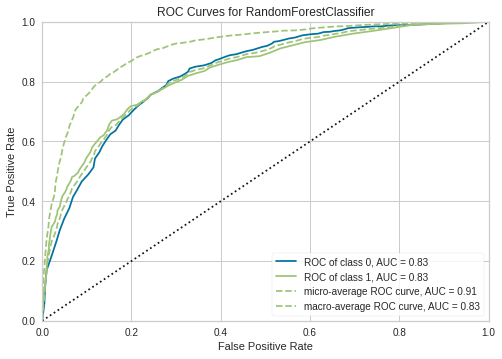

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [17]:
plot_model(estimator = rf, plot = 'auc')

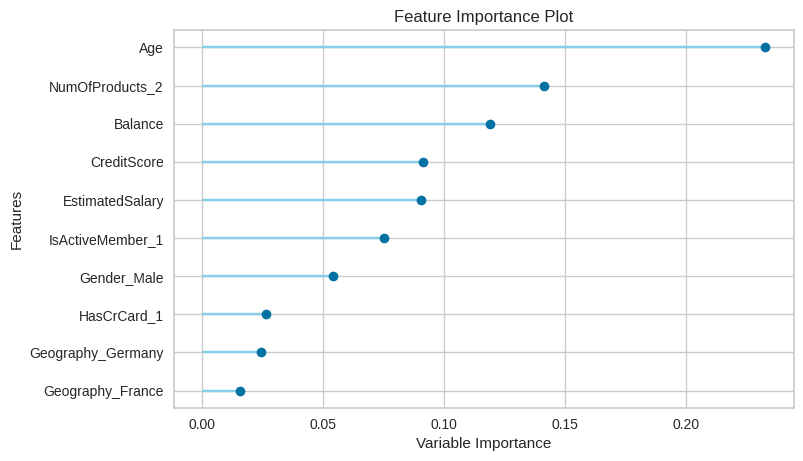

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [19]:
plot_model(estimator = rf, plot = 'feature')

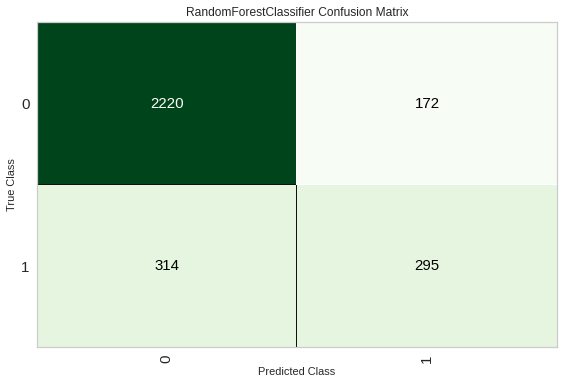

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [20]:
plot_model(estimator = rf, plot = 'confusion_matrix')